In [1]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Spaceship Titanic Dataset

data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<Axes: >

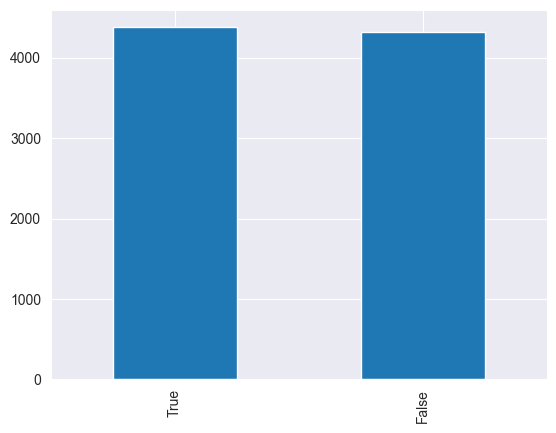

In [3]:
plot_df = data.Transported.value_counts()
plot_df.plot(kind="bar")

<Axes: xlabel='VRDeck', ylabel='Count'>

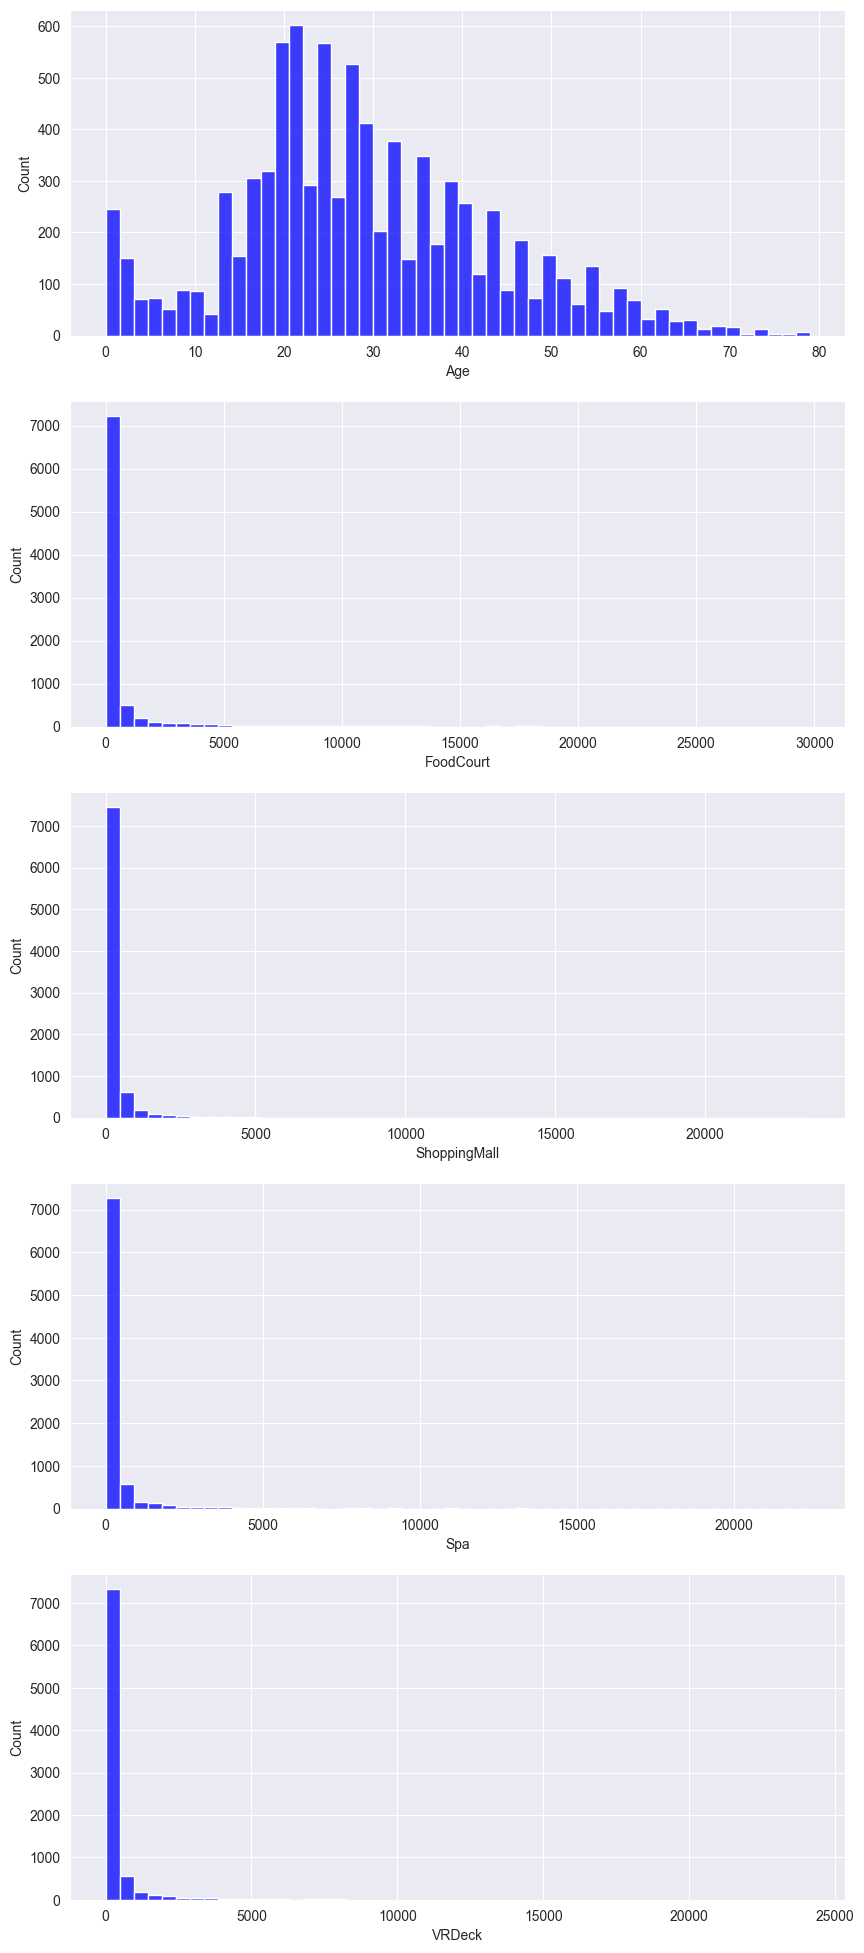

In [4]:
import seaborn as sns

fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(data['Age'], color='b', bins=50, ax=ax[0])
sns.histplot(data['FoodCourt'], color='b', bins=50, ax=ax[1])
sns.histplot(data['ShoppingMall'], color='b', bins=50, ax=ax[2])
sns.histplot(data['Spa'], color='b', bins=50, ax=ax[3])
sns.histplot(data['VRDeck'], color='b', bins=50, ax=ax[4])

In [5]:
data = data.drop(['PassengerId', 'Name'], axis=1)

In [6]:
data.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [8]:
data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
data.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [9]:
label = "Transported"
data[label] = data[label].astype(int)

In [10]:
data['VIP'] = data['VIP'].astype(int)
data['CryoSleep'] = data['CryoSleep'].astype(int)

In [11]:
data[["Deck", "Cabin_num", "Side"]] = data["Cabin"].str.split("/", expand=True)

In [12]:
try:
    data = data.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

In [13]:
data.head()
len(data)

8693

In [14]:
# 预处理消除nan值
data = data.dropna()

# sklearn随机分割数据集
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)
print(train_data)

     HomePlanet  CryoSleep    Destination   Age  VIP  RoomService  FoodCourt  \
4629       Mars          0    TRAPPIST-1e  22.0    0        223.0        0.0   
152       Earth          0    TRAPPIST-1e  58.0    0          0.0      985.0   
7166     Europa          0    55 Cancri e  24.0    0        145.0     4224.0   
4599      Earth          0  PSO J318.5-22  32.0    0          8.0      690.0   
7224      Earth          0    TRAPPIST-1e  64.0    0          0.0        0.0   
...         ...        ...            ...   ...  ...          ...        ...   
1039       Mars          0    TRAPPIST-1e  58.0    0         55.0        0.0   
5815     Europa          0    TRAPPIST-1e  31.0    0          0.0       53.0   
4470       Mars          0    TRAPPIST-1e  36.0    0        850.0        0.0   
263      Europa          1    55 Cancri e  19.0    0          0.0        0.0   
5774     Europa          0    TRAPPIST-1e  56.0    0        679.0     1126.0   

      ShoppingMall     Spa  VRDeck  Tra

In [15]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = ["Age", "VIP", "CryoSleep", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
X_train = train_data[features]
y_train = train_data[label]
X_test = test_data[features]
y_test = test_data[label]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.41%


In [16]:
# sklearn xgboost
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.11%


In [17]:
# CartModel
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.48%


In [18]:
# sklearn svm
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.14%


In [19]:
# sklearn knn
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.51%


In [20]:
# catboost
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Learning rate set to 0.0225
0:	learn: 0.6845335	total: 134ms	remaining: 2m 13s
1:	learn: 0.6764094	total: 137ms	remaining: 1m 8s
2:	learn: 0.6687279	total: 140ms	remaining: 46.4s
3:	learn: 0.6618903	total: 143ms	remaining: 35.5s
4:	learn: 0.6550909	total: 151ms	remaining: 30.1s
5:	learn: 0.6482469	total: 158ms	remaining: 26.2s
6:	learn: 0.6421031	total: 162ms	remaining: 22.9s
7:	learn: 0.6355314	total: 165ms	remaining: 20.4s
8:	learn: 0.6295026	total: 168ms	remaining: 18.5s
9:	learn: 0.6238483	total: 172ms	remaining: 17s
10:	learn: 0.6185636	total: 175ms	remaining: 15.7s
11:	learn: 0.6143508	total: 180ms	remaining: 14.8s
12:	learn: 0.6096320	total: 184ms	remaining: 13.9s
13:	learn: 0.6043658	total: 188ms	remaining: 13.3s
14:	learn: 0.5997830	total: 193ms	remaining: 12.7s
15:	learn: 0.5959036	total: 196ms	remaining: 12s
16:	learn: 0.5917893	total: 198ms	remaining: 11.5s
17:	learn: 0.5881819	total: 201ms	remaining: 11s
18:	learn: 0.5847409	total: 204ms	remaining: 10.5s
19:	learn: 0.58110

In [21]:
# 自动调节catboost参数
from sklearn.model_selection import GridSearchCV

model = CatBoostClassifier()
parameters = {'depth': [4, 7, 10],
              'learning_rate': [0.03, 0.1, 0.15],
              'l2_leaf_reg': [1, 4, 9],
              'iterations': [300]}
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
# {'depth': 4, 'iterations': 300, 'l2_leaf_reg': 9, 'learning_rate': 0.1}

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6609884	total: 2.94ms	remaining: 880ms
1:	learn: 0.6342190	total: 5.99ms	remaining: 893ms
2:	learn: 0.6135729	total: 8.07ms	remaining: 799ms
3:	learn: 0.5996799	total: 10.4ms	remaining: 771ms
4:	learn: 0.5839964	total: 12.8ms	remaining: 753ms
5:	learn: 0.5724117	total: 15.2ms	remaining: 745ms
6:	learn: 0.5629615	total: 17.9ms	remaining: 748ms
7:	learn: 0.5550512	total: 20.5ms	remaining: 747ms
8:	learn: 0.5487042	total: 23ms	remaining: 743ms
9:	learn: 0.5421621	total: 25.7ms	remaining: 746ms
10:	learn: 0.5356655	total: 28.3ms	remaining: 743ms
11:	learn: 0.5308892	total: 31.2ms	remaining: 748ms
12:	learn: 0.5274136	total: 34.5ms	remaining: 762ms
13:	learn: 0.5237807	total: 38.7ms	remaining: 790ms
14:	learn: 0.5211253	total: 41.3ms	remaining: 785ms
15:	learn: 0.5179619	total: 43.8ms	remaining: 778ms
16:	learn: 0.5153859	total: 46.3ms	remaining: 771ms
17:	learn: 0.5126703	total: 48.6ms	remaining: 762ms
18:	learn: 0.5

In [22]:
# 用最好参数的catboost

model = CatBoostClassifier(depth=4, iterations=300, l2_leaf_reg=9, learning_rate=0.1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0:	learn: 0.6609884	total: 2.57ms	remaining: 768ms
1:	learn: 0.6342190	total: 4.98ms	remaining: 743ms
2:	learn: 0.6135729	total: 7.15ms	remaining: 708ms
3:	learn: 0.5996799	total: 9.71ms	remaining: 719ms
4:	learn: 0.5839964	total: 12ms	remaining: 707ms
5:	learn: 0.5724117	total: 14.6ms	remaining: 715ms
6:	learn: 0.5629615	total: 16.9ms	remaining: 708ms
7:	learn: 0.5550512	total: 19.1ms	remaining: 698ms
8:	learn: 0.5487042	total: 22ms	remaining: 712ms
9:	learn: 0.5421621	total: 25ms	remaining: 725ms
10:	learn: 0.5356655	total: 27.4ms	remaining: 721ms
11:	learn: 0.5308892	total: 29.8ms	remaining: 716ms
12:	learn: 0.5274136	total: 32.5ms	remaining: 717ms
13:	learn: 0.5237807	total: 34.8ms	remaining: 712ms
14:	learn: 0.5211253	total: 37.6ms	remaining: 715ms
15:	learn: 0.5179619	total: 40.1ms	remaining: 711ms
16:	learn: 0.5153859	total: 42.6ms	remaining: 709ms
17:	learn: 0.5126703	total: 44.7ms	remaining: 700ms
18:	learn: 0.5098033	total: 47.7ms	remaining: 705ms
19:	learn: 0.5080567	total: 

In [ ]:
# # 用精确度最高的模型进行预测
# test = pd.read_csv('data/test.csv')
#
# PassengerId = test['PassengerId']
# test = test.drop(['PassengerId', 'Name'], axis=1)
#
# test[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
# test['VIP'] = test['VIP'].astype(int)
# test['CryoSleep'] = test['CryoSleep'].astype(int)
# test[["Deck", "Cabin_num", "Side"]] = test["Cabin"].str.split("/", expand=True)
#
# try:
#     test = test.drop('Cabin', axis=1)
# except KeyError:
#     print("Field does not exist")
# test = test.fillna(0)
#
# X_test = test[features]
# predictions = model.predict(X_test)
#
# # 写入到simple文件中
# print(len(PassengerId), len(predictions))
# # 转换为bool值
#
# predictions = predictions.astype(bool)
# output = pd.DataFrame({'PassengerId': PassengerId, label: predictions})
# output.to_csv('simple.csv', index=False)

In [23]:
# LGBM
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.53%


In [24]:
# 用精确度最高的模型进行预测
test = pd.read_csv('data/test.csv')

PassengerId = test['PassengerId']
test = test.drop(['PassengerId', 'Name'], axis=1)
test[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
test['VIP'] = test['VIP'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)
test[["Deck", "Cabin_num", "Side"]] = test["Cabin"].str.split("/", expand=True)

try:
    test = test.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")
test = test.fillna(0)

X_test = test[features]
predictions = model.predict(X_test)

# 写入到simple文件中
print(len(PassengerId), len(predictions))
# 转换为bool值

predictions = predictions.astype(bool)
output = pd.DataFrame({'PassengerId': PassengerId, label: predictions})
output.to_csv('simple.csv', index=False)

4277 4277
